#### Built a basic chatbot using Langgraph (Graph API)

In [1]:
from typing import Annotated
from typing_extensions import TypedDict


from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages    # Reducer to append the previous communication back to State.

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    message: Annotated[list, add_messages]

#### Initiate the LLM model

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
openai_api_key = os.getenv("OPENAI_API_KEY")


In [5]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o-mini",
    api_key=openai_api_key,
    temperature=0.2,
    streaming=True,
)

In [6]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002605136F3B0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x00000260517EEFF0>, root_client=<openai.OpenAI object at 0x000002604F8CB4D0>, root_async_client=<openai.AsyncOpenAI object at 0x00000260512F22A0>, model_name='gpt-4o-mini', temperature=0.2, model_kwargs={}, openai_api_key=SecretStr('**********'), streaming=True)

In [7]:
# Node Functionality
def chatbot(state: State):
    return {"message": [llm.invoke(state["message"])]}

#### Here build the graph

In [8]:
graph_builder = StateGraph(State)
# Add the functional node
graph_builder.add_node("llmchatbot", chatbot)
# Add the edges
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# Compile the graph
graph = graph_builder.compile()


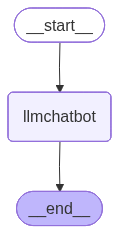

In [9]:
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e) 

In [10]:
response = graph.invoke({"message": "Hi"})

In [11]:
response['message'][-1].content

'Hello! How can I assist you today?'